Intel Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
import datetime as dt
from datetime import datetime
import os

In [2]:
path = "C:\\Users\\PS\\Desktop"
os.getcwd()
os.chdir(path)

pd.set_option('display.max_columns',100) #display upto 100 columns
pd.set_option('display.float_format', lambda x: '%.3f' % x) #convert scientific notation

In [3]:
headers = ['Date','Time','Epoch','Mote','Temp','Humidity','Light','Voltage'] 
data = pd.read_csv('./data.csv', sep=' ', header=None, names=headers, 
                   parse_dates=True)

print('Count of missing values:')
print(data.isnull().sum())
data.describe(include='all')


Count of missing values:
Date            0
Time            0
Epoch           0
Mote          526
Temp          901
Humidity      902
Light       93878
Voltage       526
dtype: int64


,Date,Time,Epoch,Mote,Temp,Humidity,Light,Voltage
count,2313682,2313682,2313682.000,2313156.000,2312781.000,2312780.000,2219804.000,2313156.000
unique,38,2313649,nan,nan,nan,nan,nan,nan
top,2004-03-08,02:33:10.775785,nan,nan,nan,nan,nan,nan
freq,101208,2,nan,nan,nan,nan,nan,nan
mean,NaN,NaN,33039.931,28.544,39.207,33.908,407.211,2.493
std,NaN,NaN,18368.524,50.624,37.419,17.322,539.428,0.180
min,NaN,NaN,0.000,1.000,-38.400,-8983.130,0.000,0.009
25%,NaN,NaN,17572.000,17.000,20.410,31.878,39.560,2.385
50%,NaN,NaN,33327.000,29.000,22.438,39.280,158.240,2.527
75%,NaN,NaN,47789.000,41.000,27.025,43.586,537.280,2.628


After observing the minimum and maximum values of all variables, data is filtered based on given range of sensor readings


In [4]:
countRaw = data['Date'].count() #store number of rows in the original file

#Remove rows with Mote ID greater than 54
dataC = data[data.Mote < 55]

#Remove rows with temperature below 10 and above 35 degrees Celsius
dataC = dataC[dataC.Temp < 35]
dataC = dataC[dataC.Temp > 10]

#Humidity between 20% and 70%
dataC = dataC[dataC.Humidity > 20] #count=1396508
dataC = dataC[dataC.Humidity < 75] #count=1396508

#Light with Lux less than 100000
dataC = dataC[dataC.Light > 0] #count=1347379
dataC = dataC[dataC.Light < 100000] #count=1347379

#Voltage readings between 1.5V and 3.5V
dataC = dataC[dataC.Voltage > 1.5] #count=1347379
dataC = dataC[dataC.Voltage < 3.5] #count=1347379

count1 = dataC['Date'].count() #Store number of rows in cleansed data
loss1 = countRaw - count1
print("Data points lost after first cleanup: ", loss1)
print("Missing Values after cleanup:", '\n', dataC.isnull().sum())


Data points lost after first cleanup:  528198
Missing Values after cleanup: 
 Date        0
Time        0
Epoch       0
Mote        0
Temp        0
Humidity    0
Light       0
Voltage     0
dtype: int64


In [5]:
DateC = dataC['Date'].unique() #storing date values from cleansed data 

DateOG = data['Date'].unique() #storing date values from Raw file

U_MoteNew = dataC['Mote'].unique() #Storing Mote IDs from cleansed data

U_MoteOld = data['Mote'].unique() #Storing Mote IDs from Raw file


set(DateOG) - set(DateC)

{'2004-03-26',
 '2004-03-27',
 '2004-03-28',
 '2004-03-29',
 '2004-03-30',
 '2004-03-31',
 '2004-04-03',
 '2004-04-04',
 '2004-04-05'}

The above dates have missing values for sensor readings.

In [6]:
set(U_MoteOld) - set(U_MoteNew)

{nan, 5.0, 28.0, 55.0, 56.0, 57.0, 58.0, 6485.0, 33117.0, 65407.0}

Mote 5 and Mote 28 have been eliminated after cleansing. We investigate data from these Motes.

In [7]:
data5 = data[data.Mote == 5]
data28 = data[data.Mote == 28]

data5.head()
#Values missing for Light, Temperature and Humidity

,Date,Time,Epoch,Mote,Temp,Humidity,Light,Voltage
180389,2004-02-28,02:21:16.59372,167,5.000,nan,nan,nan,2.700
180390,2004-02-28,03:42:46.678899,330,5.000,nan,nan,nan,2.675
180391,2004-02-28,05:20:16.549645,525,5.000,nan,nan,nan,2.651
180392,2004-02-28,09:32:47.471012,1030,5.000,nan,nan,nan,2.651
180393,2004-02-28,13:05:48.430632,1456,5.000,nan,nan,nan,2.687


In [8]:
data5.tail()

,Date,Time,Epoch,Mote,Temp,Humidity,Light,Voltage
180419,2004-03-02,22:48:56.59882,11262,5.000,nan,nan,nan,2.276
180420,2004-03-03,02:02:26.487083,11649,5.000,nan,nan,nan,2.250
180421,2004-03-03,04:53:29.437907,11991,5.000,nan,nan,nan,2.216
180422,2004-03-03,06:52:58.11797,12230,5.000,nan,nan,nan,2.200
180423,2004-03-03,17:10:56.993959,13466,5.000,nan,nan,nan,2.168


In [9]:
#Checking values above and below Mote_Id Nans
data.iloc[180385:180391]

,Date,Time,Epoch,Mote,Temp,Humidity,Light,Voltage
180385,2004-03-21,19:01:56.585115,65527,4.000,85.305,46.230,5.520,2.302
180386,2004-03-21,19:02:26.792489,65528,4.000,87.383,45.440,5.520,2.311
180387,2004-03-21,19:04:09.330906,65531,4.000,87.314,45.176,5.520,2.311
180388,2004-03-21,19:05:07.402885,65533,4.000,89.147,45.176,5.060,2.311
180389,2004-02-28,02:21:16.59372,167,5.000,nan,nan,nan,2.700
180390,2004-02-28,03:42:46.678899,330,5.000,nan,nan,nan,2.675


In [10]:
data.iloc[180421:180426]

,Date,Time,Epoch,Mote,Temp,Humidity,Light,Voltage
180421,2004-03-03,04:53:29.437907,11991,5.000,nan,nan,nan,2.216
180422,2004-03-03,06:52:58.11797,12230,5.000,nan,nan,nan,2.200
180423,2004-03-03,17:10:56.993959,13466,5.000,nan,nan,nan,2.168
180424,2004-02-28,00:58:46.657464,2,6.000,20.420,36.612,121.440,2.651
180425,2004-02-28,01:00:46.525723,6,6.000,19.900,37.574,121.440,2.640


No Nans found under column Mote_Id around Mote 5

In [11]:
data28.head(5)
data28.tail(5)
#Values missing for Light

,Date,Time,Epoch,Mote,Temp,Humidity,Light,Voltage
1125087,2004-03-21,19:01:06.65973,65525,28.000,20.018,49.549,nan,2.464
1125088,2004-03-21,19:01:55.92762,65527,28.000,20.008,49.581,nan,2.464
1125089,2004-03-21,19:03:56.19482,65531,28.000,19.988,49.614,nan,2.464
1125090,2004-03-21,19:04:55.269209,65533,28.000,19.988,49.614,nan,2.464
1125091,2004-03-21,19:05:26.077055,65534,28.000,19.979,49.646,nan,2.464


Motes 5 and 28 are very much present with incomplete readings. We now locate rows where Mote id is missing

In [12]:
nan_rows = data[data['Mote'].isnull()]
nan_rows.head()

,Date,Time,Epoch,Mote,Temp,Humidity,Light,Voltage
2313156,2004-02-28,00:58:15.315133,1,nan,nan,nan,nan,nan
2313157,2004-03-31,18:37:46.785947,2,nan,nan,nan,nan,nan
2313158,2004-03-31,18:40:46.949392,3,nan,nan,nan,nan,nan
2313159,2004-03-31,18:43:46.657166,4,nan,nan,nan,nan,nan
2313160,2004-03-31,18:46:46.417537,5,nan,nan,nan,nan,nan


In [13]:
nan_rows.tail()

,Date,Time,Epoch,Mote,Temp,Humidity,Light,Voltage
2313677,2004-04-02,01:14:54.164318,61274,nan,nan,nan,nan,nan
2313678,2004-04-02,01:17:53.670524,61275,nan,nan,nan,nan,nan
2313679,2004-04-02,01:20:52.807972,61276,nan,nan,nan,nan,nan
2313680,2004-04-02,01:26:53.950342,61278,nan,nan,nan,nan,nan
2313681,2004-04-02,01:35:53.897412,61280,nan,nan,nan,nan,nan


In [14]:
data.iloc[2313152:2313157]

,Date,Time,Epoch,Mote,Temp,Humidity,Light,Voltage
2313152,2004-04-02,09:09:22.206544,62427,58.000,24.104,21.437,1729.600,2.788
2313153,2004-03-23,21:32:16.223693,35112,6485.000,262.656,nan,nan,0.393
2313154,2004-03-09,15:04:42.202647,30493,33117.000,-36.205,nan,nan,0.145
2313155,2004-03-05,08:29:04.505813,18182,65407.000,294.251,nan,nan,0.013
2313156,2004-02-28,00:58:15.315133,1,nan,nan,nan,nan,nan


We can observe, the missing values for column Mote appear after Mote 54, which are irrelevant.

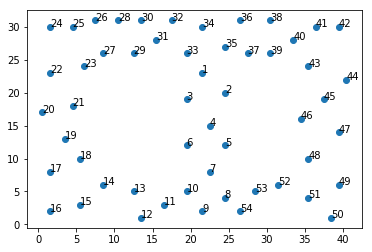

In [15]:
#Visualizing Mote locations to verify neighbors for Mote 5 and Mote 28
heads = ['Mote', 'X', 'Y']
m_coords = pd.read_csv('./Mote_coords.csv', header=None, names=heads)

x = m_coords.iloc[:,]['X']
y = m_coords.iloc[:,]['Y']
m = m_coords.iloc[:,]['Mote']

fig, ax = plt.subplots()
ax.scatter(x,y)
for i, txt in enumerate(m):
    ax.annotate(txt, (x[i], y[i]))
#We can verify that Mote 5 is closest to Mote 4, and Mote 28 closest to Mote 26
#Therefore missing values can be imputed with medians    

In [16]:
medG = data.groupby('Mote')[['Light']].median()
#Find median Light for all motes
#medG.iloc[3]['G']

data.loc[data['Mote'] == 28, "Light"] = medG.iloc[25]['Light']
#Replace for mote 28 with Light median for mote 26 as they are close
#this makes mote 28 have all the columns filled, hence no need to drop mote 28

#Although Mote 4 is closly placed to Mote 5, readings for humidity, temperature cannot be
#substituted as there can be considerable differences. Also missing out values from Mote 5 would mean
#dropping 35 rows of information, which does not have a considerable impact on 300000+ rows


In [17]:
#Second Cleanup after including Mote 28:
dataC = data[data.Mote < 55]
dataC['Date'].count() #

dataC = dataC[dataC.Temp < 35]
dataC = dataC[dataC.Temp > 10]

dataC = dataC[dataC.Humidity > 20]
dataC = dataC[dataC.Humidity < 75]

dataC = dataC[dataC.Light > 0]
dataC = dataC[dataC.Light < 100000]

dataC = dataC[dataC.Voltage > 1.5]
dataC = dataC[dataC.Voltage < 3.5]


print("Missing values after second cleanup: ",'\n',  dataC.isnull().sum())
#check for missing values

count2 = dataC['Date'].count()
loss2 = countRaw - count2
print("Data points lost after second cleanup : ", loss2)
print("Data points retained after second cleanup: ", loss1 - loss2)



Missing values after second cleanup:  
 Date        0
Time        0
Epoch       0
Mote        0
Temp        0
Humidity    0
Light       0
Voltage     0
dtype: int64
Data points lost after second cleanup :  490016
Data points retained after second cleanup:  38182


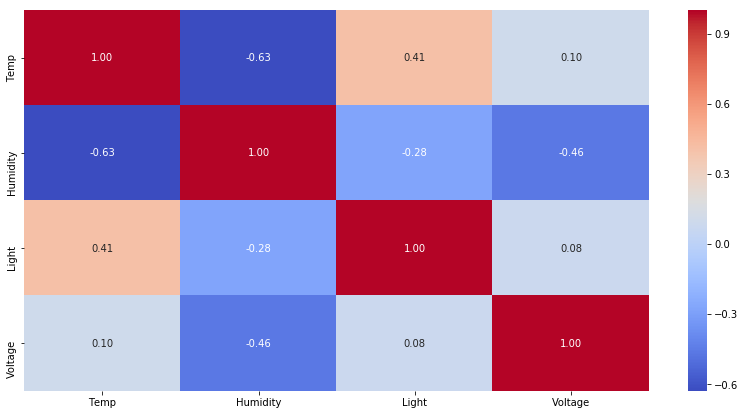

In [18]:
#Observe correlations amongst variables:
plt.figure(figsize=(14,7))
sns.heatmap(data=dataC.iloc[:,4:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()


Humidity is negatively correlated with Voltage, Temperature
Temperature is positively correlated with Light

In [19]:
#Convert date and time to epoch time, could be used to easily sort data for time-series analysis
dataC['period'] = dataC['Date'].map(str) + ' ' + dataC['Time']
dataC['period'] = dataC['period'].str[:19]
dataC['period'] = pd.to_datetime(dataC['period'])
dataC['EpochTime'] = (dataC['period'] - dt.datetime(1970,1,1)).dt.total_seconds()


In [20]:
dataC.head()

,Date,Time,Epoch,Mote,Temp,Humidity,Light,Voltage,period,EpochTime
1,2004-02-28,00:59:16.02785,3,1.000,19.988,37.093,45.080,2.700,2004-02-28 00:59:16,1077929956.000
2,2004-02-28,01:03:16.33393,11,1.000,19.302,38.463,45.080,2.687,2004-02-28 01:03:16,1077930196.000
3,2004-02-28,01:06:16.013453,17,1.000,19.165,38.804,45.080,2.687,2004-02-28 01:06:16,1077930376.000
4,2004-02-28,01:06:46.778088,18,1.000,19.175,38.838,45.080,2.700,2004-02-28 01:06:46,1077930406.000
5,2004-02-28,01:08:45.992524,22,1.000,19.146,38.940,45.080,2.687,2004-02-28 01:08:45,1077930525.000


In [21]:
#We can check for each desired Mote reading as per given date or between/before/after dates using EpochTime
M_46 = dataC[(dataC.Date == '2004-02-28') & (dataC.Mote == 46)]
M_46.head()

,Date,Time,Epoch,Mote,Temp,Humidity,Light,Voltage,period,EpochTime
1938258,2004-02-28,01:06:46.232475,18,46.000,18.391,38.599,114.080,2.485,2004-02-28 01:06:46,1077930406.000
1938259,2004-02-28,01:07:16.327646,19,46.000,18.381,38.667,114.080,2.495,2004-02-28 01:07:16,1077930436.000
1938260,2004-02-28,01:07:46.088858,20,46.000,18.362,38.667,114.080,2.495,2004-02-28 01:07:46,1077930466.000
1938261,2004-02-28,01:08:16.813675,21,46.000,18.342,38.736,114.080,2.485,2004-02-28 01:08:16,1077930496.000
1938262,2004-02-28,01:08:46.125095,22,46.000,18.342,38.736,114.080,2.485,2004-02-28 01:08:46,1077930526.000


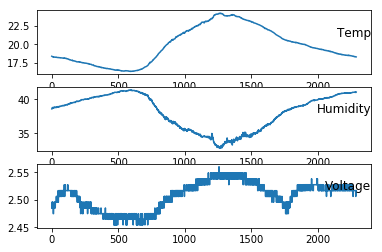

In [22]:
#We can check for each desired Mote reading as per given date or between/before/after dates using EpochTime
values = M_46.values
# specify columns to plot
groups = [4, 5, 7]
i = 1
# plot each column
plt.figure()
for g in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, g])
	plt.title(M_46.columns[g], y=0.5, loc='right')
	i += 1
plt.show()

As per the correlations obtained, we can verify the behavior of these variables with respect to each other.
High negative correlation gives almost opposite graphs for Temperature and Humidity. 

In [23]:
#Slicing dataframes by number of Motes, roughly 13 each
Mote13 = dataC[dataC.Mote < 14]
Mote26 = dataC[(dataC.Mote > 13) & (dataC.Mote < 27)]
Mote39 = dataC[(dataC.Mote > 26) & (dataC.Mote < 37)]
Mote54 = dataC[dataC.Mote > 36]

In [50]:
def plot_figs(dataC, a,b, column):
    fig, ax = plt.subplots(figsize=(15,7))
    plot_title ='Median ' + column + ' readings for Mote:' + str(a + 1)+':'+str(b - 1)
    mote_temp = dataC[(dataC.Mote > a) & (dataC.Mote < b)]
    mote_temp.groupby(['Date','Mote']).median()[column].unstack().plot(ax=ax)
    plt.legend((mote_temp['Mote'].unique()), loc='upper right', ncol = 7)
    plt.title(plot_title)

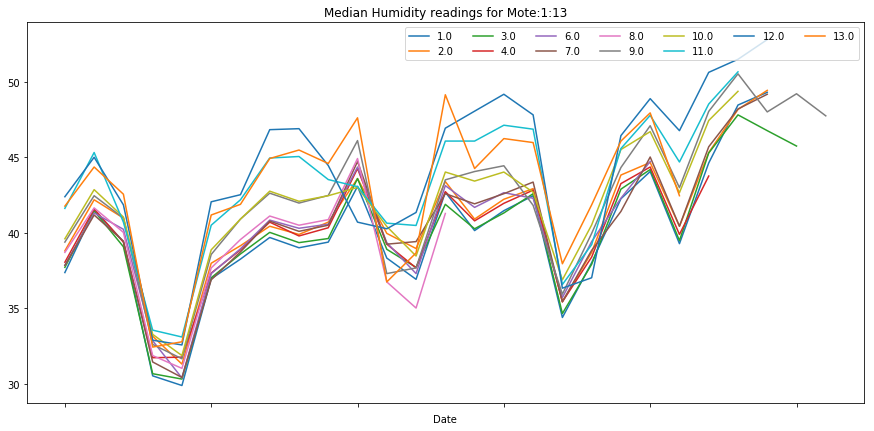

In [51]:
plot_figs(dataC, 0,14, 'Humidity')

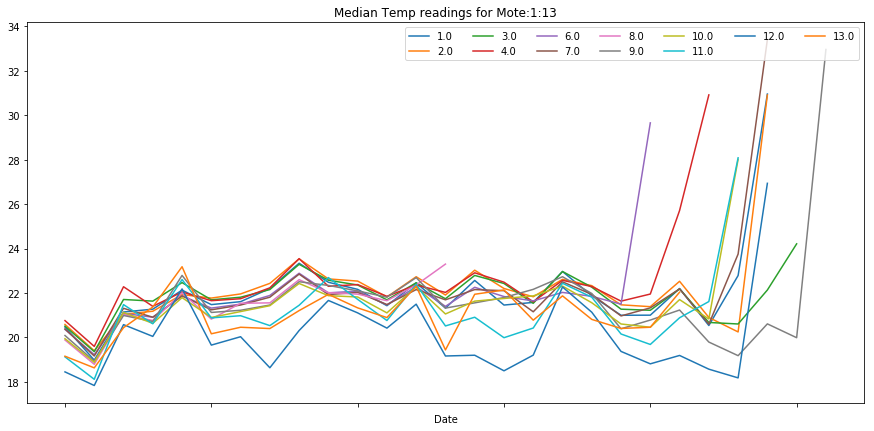

In [52]:
plot_figs(dataC, 0,14, 'Temp')

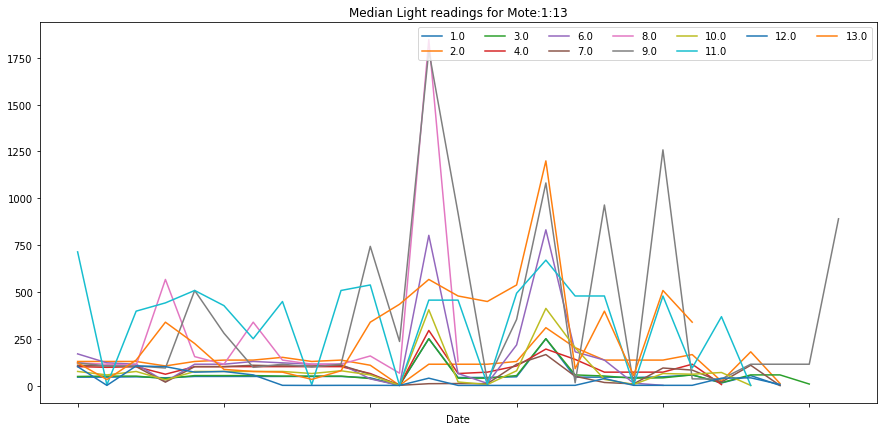

In [53]:
plot_figs(dataC, 0,14, 'Light')

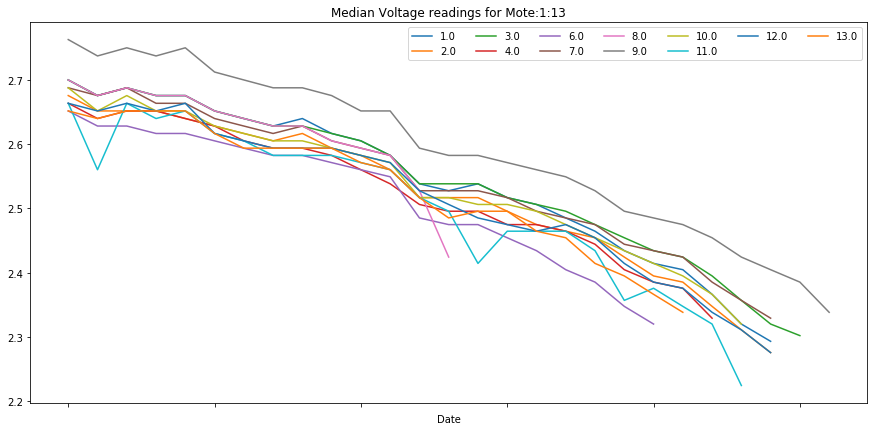

In [54]:
plot_figs(dataC, 0,14, 'Voltage')

Median readings of Humidity, Temperature, Voltage, Light: Mote 14 - 26

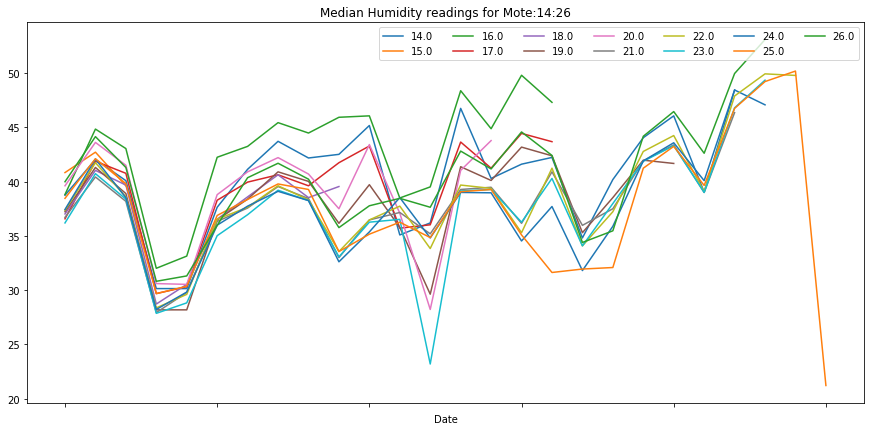

In [55]:
plot_figs(dataC, 13,27, 'Humidity')

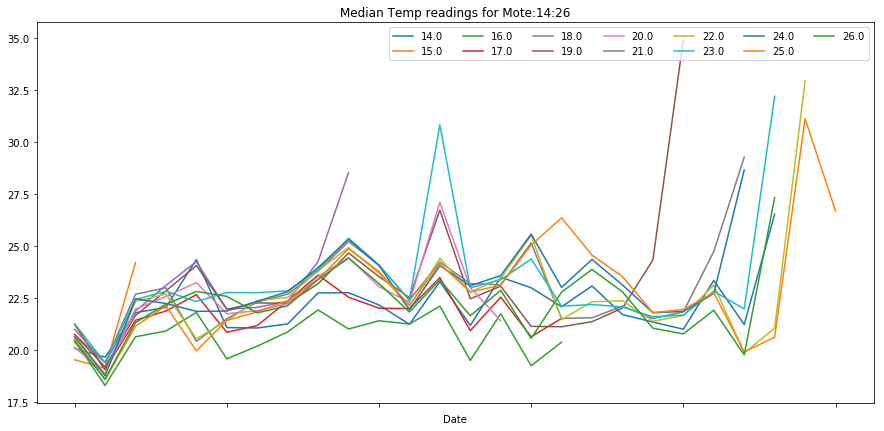

In [56]:
plot_figs(dataC, 13,27, 'Temp')

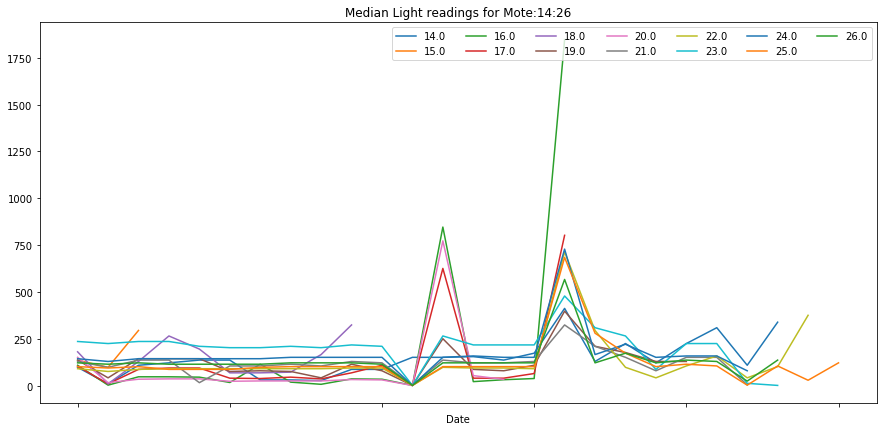

In [57]:
plot_figs(dataC, 13,27, 'Light')

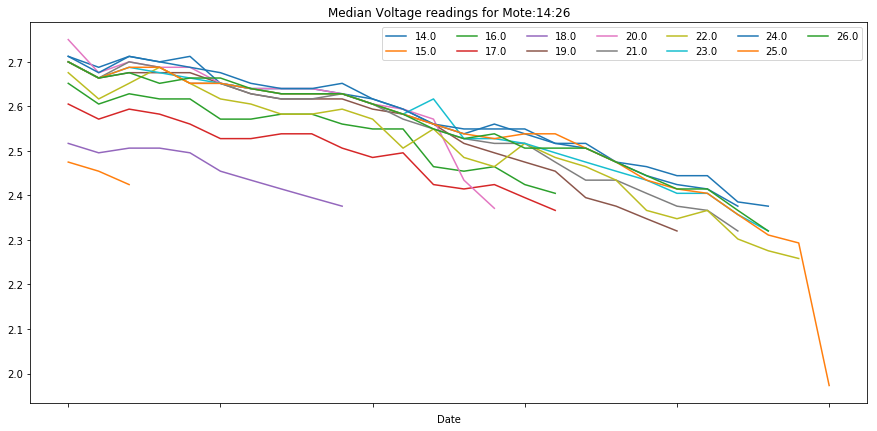

In [58]:
plot_figs(dataC, 13,27, 'Voltage')

Median readings of Humidity, Temperature, Voltage, Light: Mote 27-39 

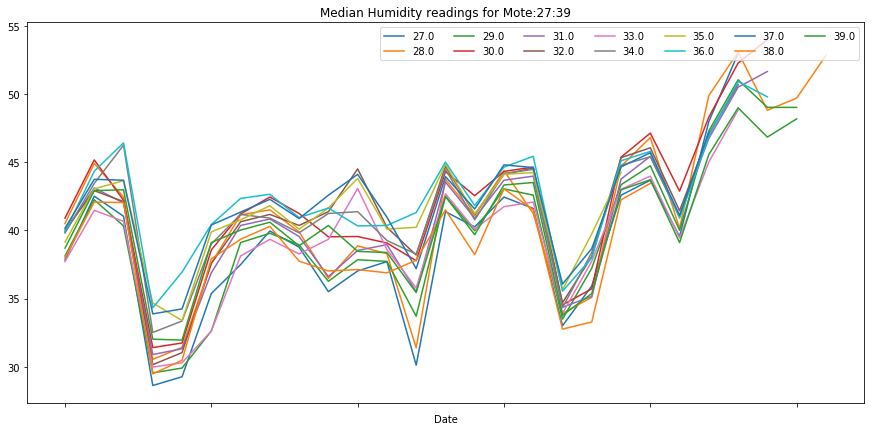

In [59]:
plot_figs(dataC, 26,40, 'Humidity')

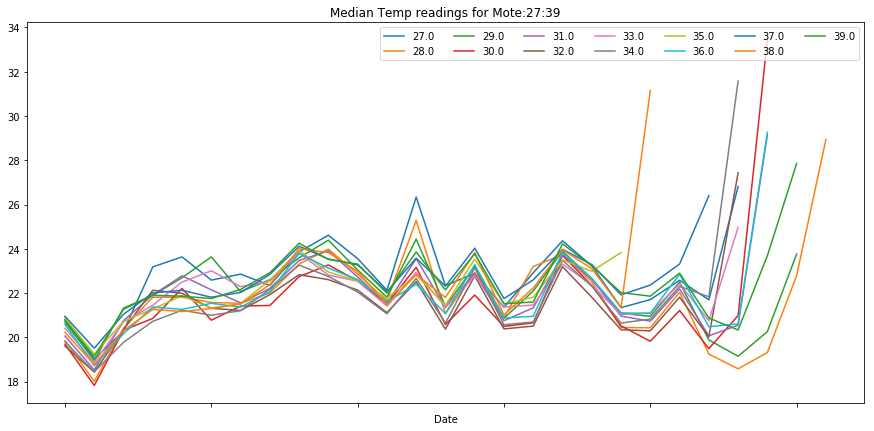

In [60]:
plot_figs(dataC, 26,40, 'Temp')

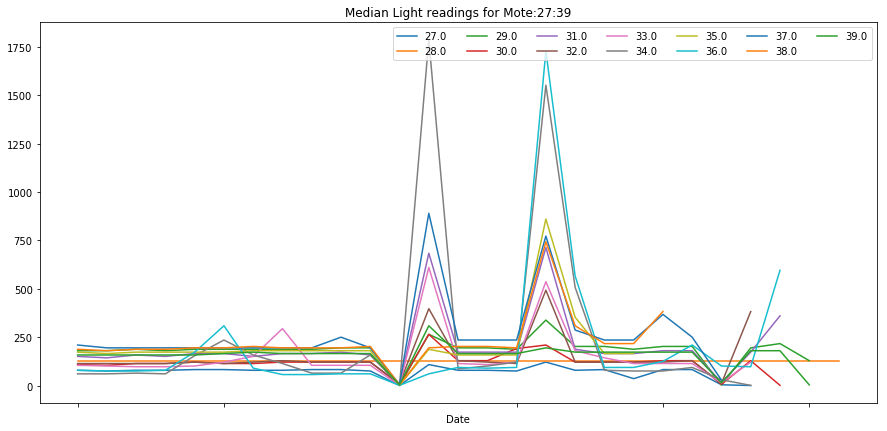

In [61]:
plot_figs(dataC, 26,40, 'Light')

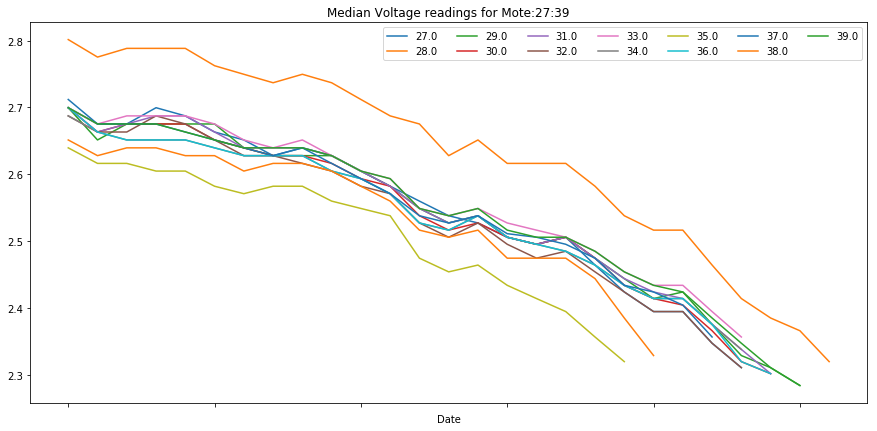

In [62]:
plot_figs(dataC, 26,40, 'Voltage')

Median readings of Humidity, Temperature, Voltage, Light: Mote 40 - 54

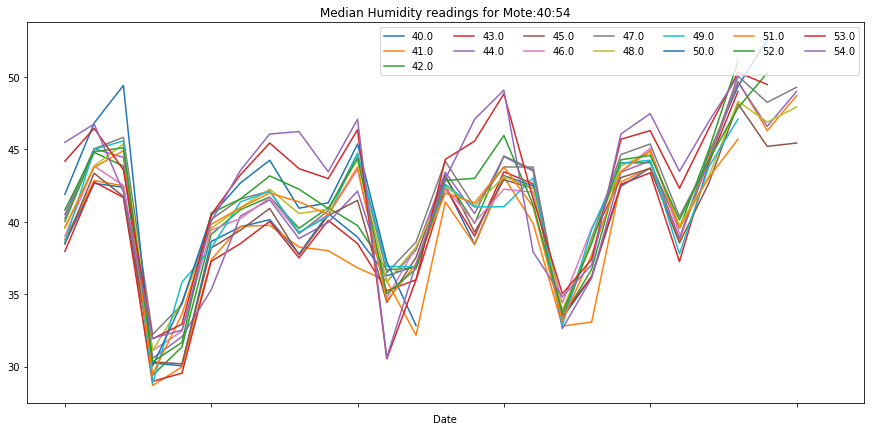

In [63]:
plot_figs(dataC, 39,55, 'Humidity')

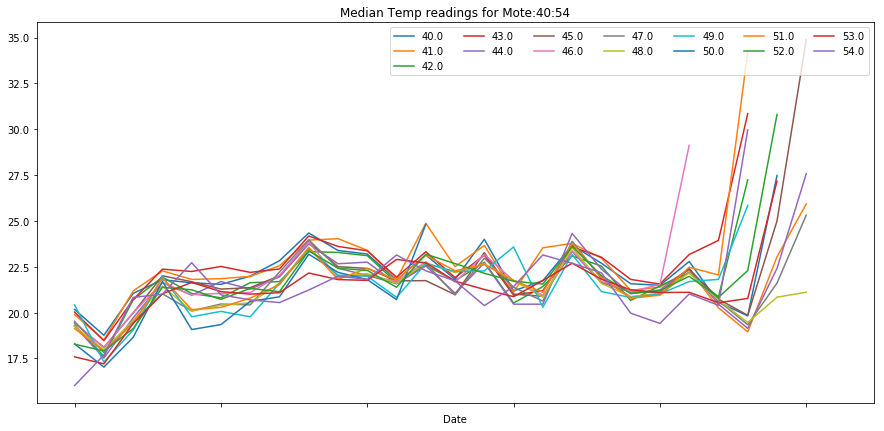

In [64]:
plot_figs(dataC, 39,55, 'Temp')

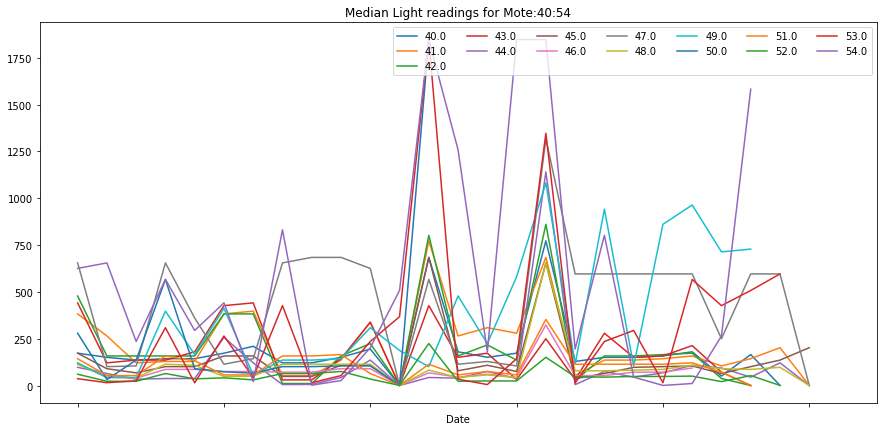

In [65]:
plot_figs(dataC, 39,55, 'Light')

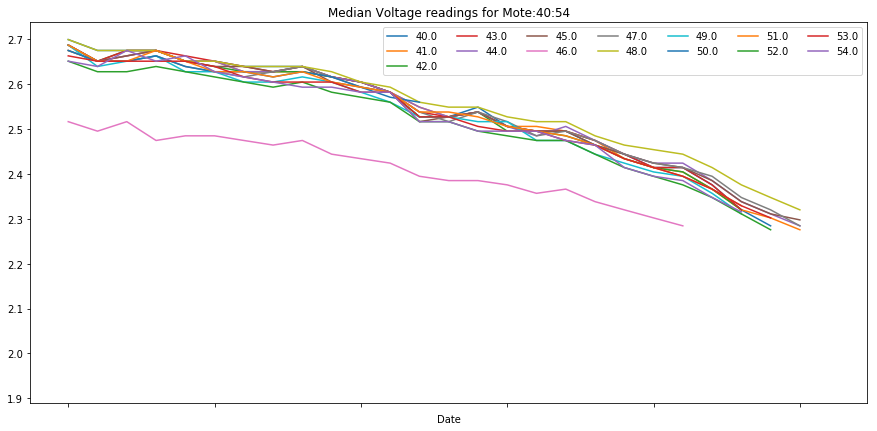

In [66]:
plot_figs(dataC, 39,55, 'Voltage')

Key Insights:
    
    Battery life for majority of Motes was about than 15-20 days. The spikes could be faulty readings due to malfunction
    caused by battery wear-out.
    
    For almost every Mote which was functioning till March 20 - March 25, we saw drastically increased temperature readings,
    after which, we had no relevant readings.
    This verifies an earlier observation regarding missing values heavily obtained for dates after March 25.
    
    Similar temperature and light spikes were observed across many Motes for March 15.
    
    Motes 15 and 18 lost power very early compared to others, the visualized locations prove high proximity suggesting common
    reason for their breakdown. Both experienced high temperatures as well as received higher amounts of Light
    just before they ceased to work. 
    
    Motes located at the left end of the room towards the top left corner (Motes 14-26), is the only group having many motes 
    malfunctioning within the first 18 days. The sudden changes in temperature and humidity might indicate reasons for
    their breakdown around March 15.